In [1]:
import numpy as np
import pandas as pd

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Dropout

from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle

import tensorflow as tf
import os

In [4]:
IMAGES = []
LABELS = []

labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

#TRAIN
for i in labels:
    folder_path = os.path.join('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Training',i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path,j))
        img = cv2.resize(img , (150,150))
        IMAGES.append(img)
        LABELS.append(i)

#TEST
for i in labels:
    folder_path = os.path.join('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing',i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path,j))
        img = cv2.resize(img , (150,150))
        IMAGES.append(img)
        LABELS.append(i)

In [5]:
IMAGES = np.array(IMAGES)
LABELS = np.array(LABELS)

In [6]:
IMAGES,LABELS = shuffle(IMAGES,LABELS, random_state = 100)

In [7]:
IMAGES.shape

(3264, 150, 150, 3)

In [8]:
LABELS.shape

(3264,)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(IMAGES,
                                                 LABELS, 
                                                 test_size=0.1, 
                                                 random_state=100)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

#OUTPUT
model.add(Dense(4,activation='softmax'))  #soft-max gives probability of each 4 tumor

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [19]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [20]:
history = model.fit(X_train,y_train, epochs=22, validation_split=0.1)

Epoch 1/22


83/83 [==============================] - 105s 1s/step - loss: 1.6686 - accuracy: 0.2993 - val_loss: 1.2107 - val_accuracy: 0.4660
Epoch 2/22
83/83 [==============================] - 110s 1s/step - loss: 1.0978 - accuracy: 0.5149 - val_loss: 0.9394 - val_accuracy: 0.5816
Epoch 3/22
83/83 [==============================] - 102s 1s/step - loss: 0.9556 - accuracy: 0.5846 - val_loss: 0.8682 - val_accuracy: 0.6463
Epoch 4/22
83/83 [==============================] - 112s 1s/step - loss: 0.8806 - accuracy: 0.6171 - val_loss: 0.8082 - val_accuracy: 0.6769
Epoch 5/22
83/83 [==============================] - 123s 1s/step - loss: 0.7575 - accuracy: 0.6754 - val_loss: 0.6312 - val_accuracy: 0.7585
Epoch 6/22
83/83 [==============================] - 121s 1s/step - loss: 0.6788 - accuracy: 0.7064 - val_loss: 0.9645 - val_accuracy: 0.5442
Epoch 7/22
83/83 [==============================] - 117s 1s/step - loss: 0.6139 - accuracy: 0.7401 - val_loss: 0.5591 - val_accuracy: 0.7177
Epoch 8/22


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

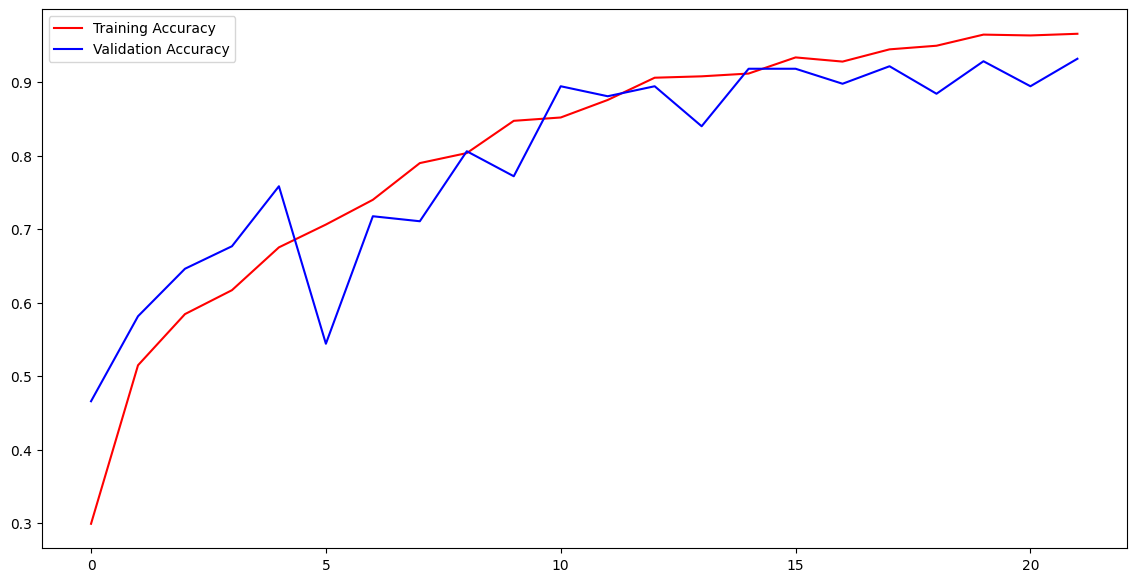

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,acc,'r',label = "Training Accuracy")
plt.plot(epochs,val_acc,'b',label = "Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

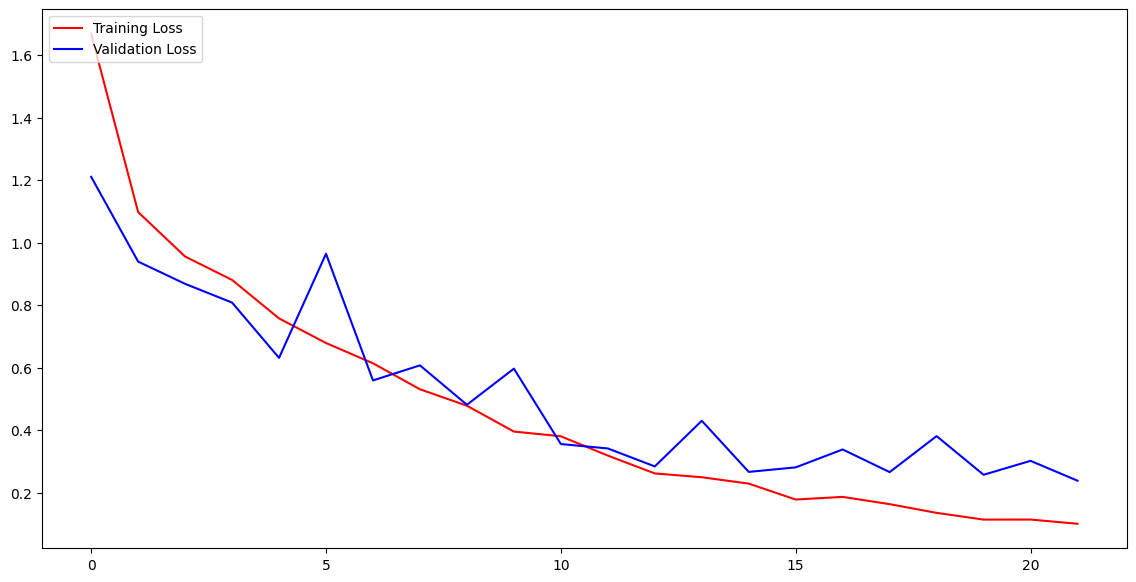

In [30]:
loss = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,loss,'r',label = "Training Loss")
plt.plot(epochs,val_acc,'b',label = "Validation Loss")
plt.legend(loc='upper left')
plt.show()

# Prediction

In [38]:
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing/pituitary_tumor/image(1).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [39]:
img_array = img_array.reshape(1,150,150,3)
img_array
img_array.shape

(1, 150, 150, 3)

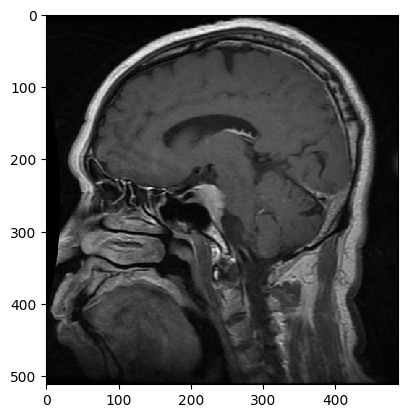

In [43]:
from tensorflow.keras.preprocessing import image

img = image.load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/MRI dataset/Testing/pituitary_tumor/image(1).jpg')
plt.imshow(img,interpolation='nearest')

In [44]:
a = model.predict(img_array)
index = a.argmax()

#['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
Prediction = labels[index]
print(Prediction)

1/1 [==============================] - 0s 38ms/step
pituitary_tumor


In [46]:
model.save('tumor.h5')

c:\users\mukhi2206\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('tumor.keras')